# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
df = pd.read_csv('Occupancy_Data.csv')
df.head(5)


,Date Time,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,02/02/15 14:19,1,23.7000,26.272,585.200000,749.200000,0.004764
1,02/02/15 14:19,1,23.7180,26.290,578.400000,760.400000,0.004773
2,02/02/15 14:21,1,23.7300,26.230,572.666667,769.666667,0.004765
3,02/02/15 14:22,1,23.7225,26.125,493.750000,774.750000,0.004744
4,02/02/15 14:23,1,23.7540,26.200,488.600000,779.000000,0.004767


# Encoding the dataset

In [3]:
# Encode date and time



## Raw data visualisation and statistics

In [4]:
df.describe()

,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,0.364728,21.433876,25.353937,193.227556,717.906470,0.004027
std,0.481444,1.028024,2.436842,250.210906,292.681718,0.000611
min,0.000000,20.200000,22.100000,0.000000,427.500000,0.003303
25%,0.000000,20.650000,23.260000,0.000000,466.000000,0.003529
50%,0.000000,20.890000,25.000000,0.000000,580.500000,0.003815
75%,1.000000,22.356667,26.856667,442.500000,956.333333,0.004532
max,1.000000,24.408333,31.472500,1697.250000,1402.250000,0.005378


In [5]:
df

,Date Time,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,02/02/15 14:19,1,23.700000,26.272000,585.200000,749.200000,0.004764
1,02/02/15 14:19,1,23.718000,26.290000,578.400000,760.400000,0.004773
2,02/02/15 14:21,1,23.730000,26.230000,572.666667,769.666667,0.004765
3,02/02/15 14:22,1,23.722500,26.125000,493.750000,774.750000,0.004744
4,02/02/15 14:23,1,23.754000,26.200000,488.600000,779.000000,0.004767
...,...,...,...,...,...,...,...
2660,04/02/15 10:38,1,24.290000,25.700000,808.000000,1150.250000,0.004829
2661,04/02/15 10:40,1,24.330000,25.736000,809.800000,1129.200000,0.004848
2662,04/02/15 10:40,1,24.330000,25.700000,817.000000,1125.800000,0.004841
2663,04/02/15 10:41,1,24.356667,25.700000,813.000000,1123.000000,0.004849


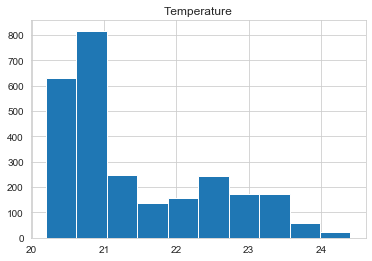

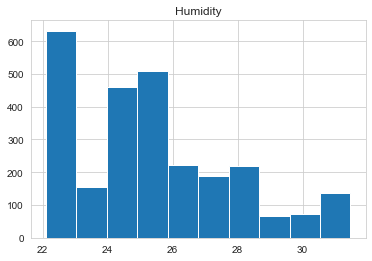

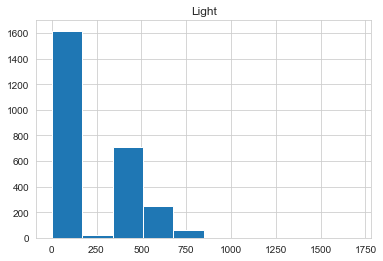

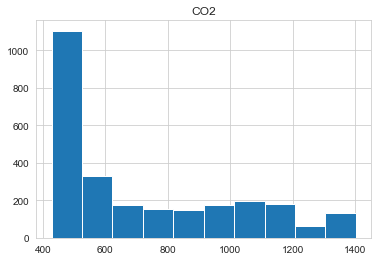

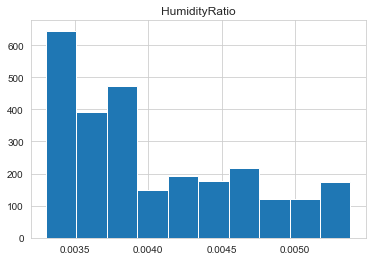

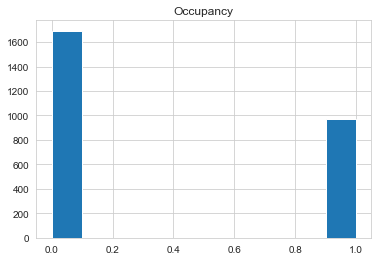

In [6]:
# histogram plots to visualise data distribution
from matplotlib import pyplot
df.hist(column = ['Temperature'])
df.hist(column = ['Humidity'])
df.hist(column = ['Light'])
df.hist(column = ['CO2'])
df.hist(column = ['HumidityRatio'])
df.hist(column = ['Occupancy'])


pyplot.show()


# #Taking care of missing data

In [7]:
df.isnull().sum() 

Date Time        0
Occupancy        0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
dtype: int64

In [8]:
sum(df.isnull().sum())

0


## Data cleaning Statregy: <br> 



In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_values=df.values
df_norm= min_max_scaler.fit_transform(df_values[:, 1:])


df_norm = pd.DataFrame(df_norm, columns=['Occupancy', 'Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio'])
df_norm 

,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,1.0,0.831683,0.445132,0.344793,0.330033,0.704212
1,1.0,0.835960,0.447053,0.340787,0.341523,0.708308
2,1.0,0.838812,0.440651,0.337409,0.351030,0.704689
3,1.0,0.837030,0.429448,0.290912,0.356245,0.694383
4,1.0,0.844515,0.437450,0.287877,0.360605,0.705384
...,...,...,...,...,...,...
2660,1.0,0.971881,0.384102,0.476064,0.741472,0.735505
2661,1.0,0.981386,0.387943,0.477125,0.719877,0.744429
2662,1.0,0.981386,0.384102,0.481367,0.716389,0.741136
2663,1.0,0.987723,0.384102,0.479010,0.713516,0.744896


In [10]:
correlation=df_norm.corr(method='pearson')
print(correlation)


               Occupancy  Temperature  Humidity     Light       CO2  \
Occupancy       1.000000     0.705784  0.610764  0.927949  0.768030   
Temperature     0.705784     1.000000  0.716988  0.768428  0.870226   
Humidity        0.610764     0.716988  1.000000  0.561905  0.911611   
Light           0.927949     0.768428  0.561905  1.000000  0.769167   
CO2             0.768030     0.870226  0.911611  0.769167  1.000000   
HumidityRatio   0.700330     0.894548  0.951914  0.693286  0.964440   

               HumidityRatio  
Occupancy           0.700330  
Temperature         0.894548  
Humidity            0.951914  
Light               0.693286  
CO2                 0.964440  
HumidityRatio       1.000000  


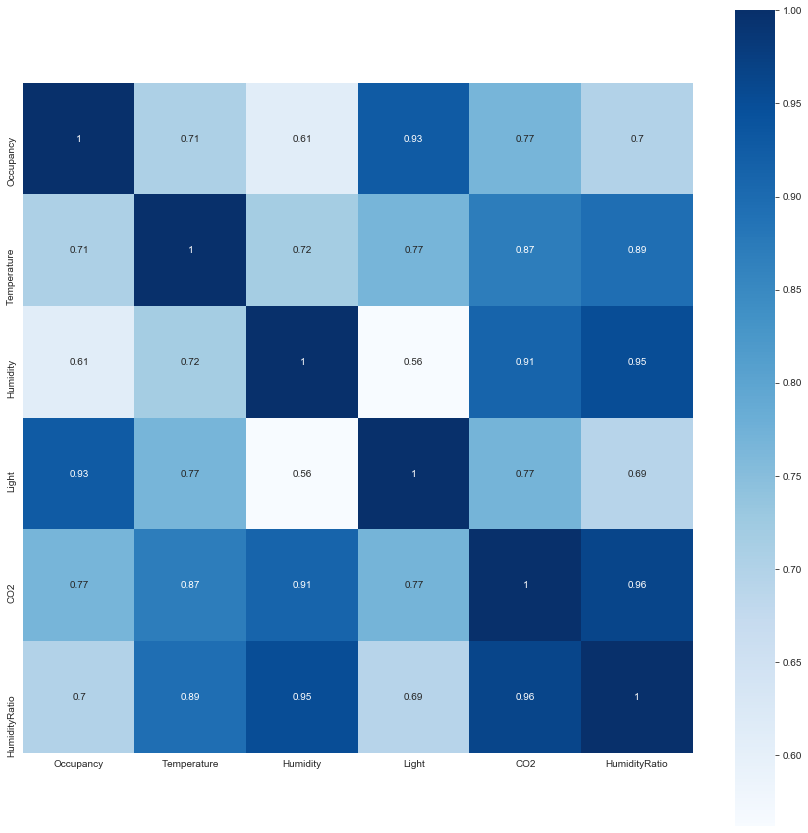

In [11]:
plt.figure(figsize=(15,15))
df_corr = df_norm.corr()

sns.heatmap(df_norm.corr(), square=True, annot=True, cmap="Blues");

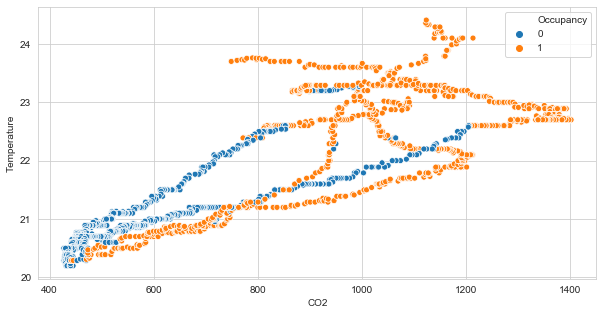

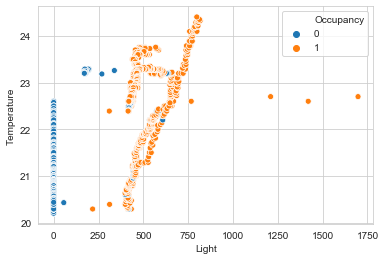

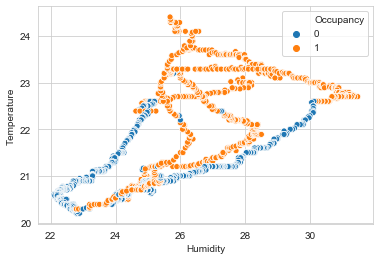

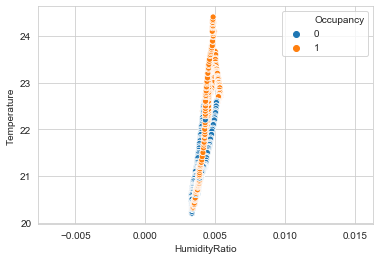

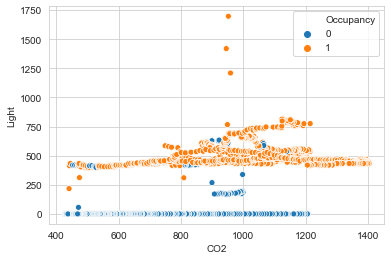

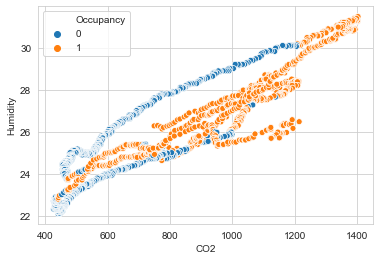

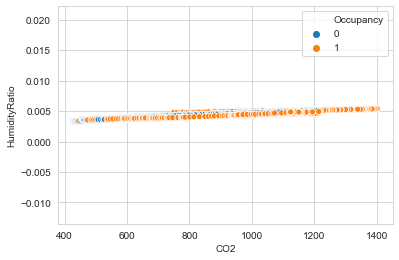

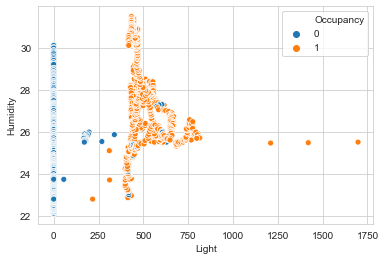

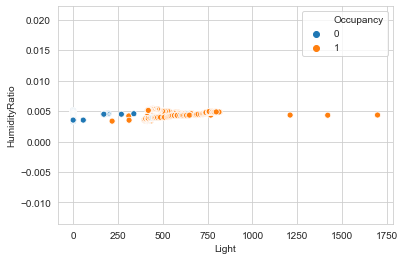

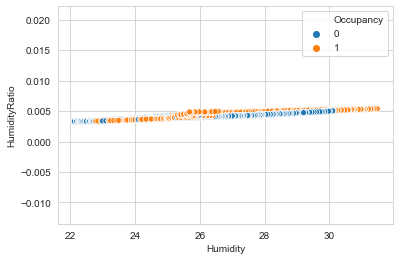

In [12]:
#scatter plots
plt.figure(figsize=(10, 5))
sns.set_style()
sns.scatterplot(data=df, x='CO2', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='Light', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='Humidity', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df,x='HumidityRatio', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='CO2', y='Light', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='CO2', y='Humidity', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='CO2', y='HumidityRatio', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='Light', y='Humidity', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='Light', y='HumidityRatio', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='Humidity', y='HumidityRatio', hue='Occupancy')
plt.show()


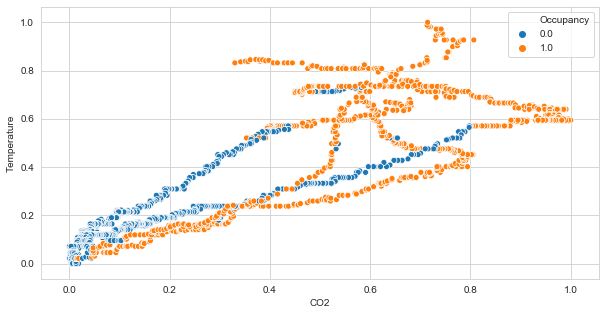

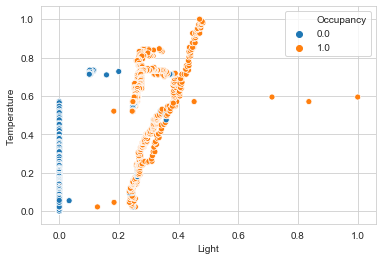

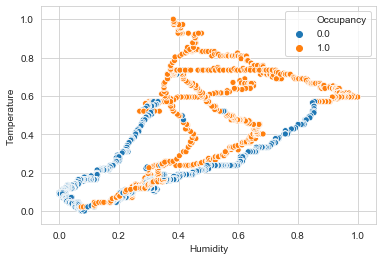

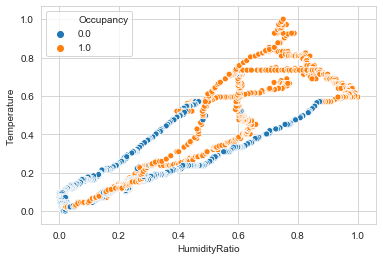

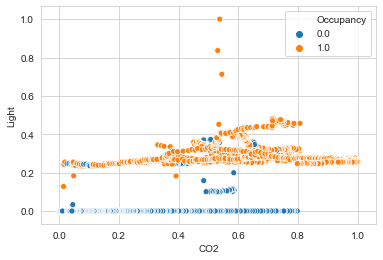

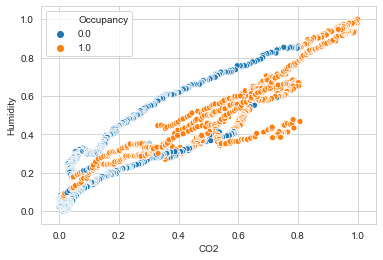

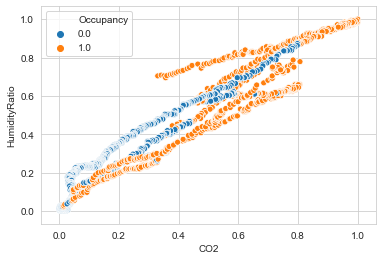

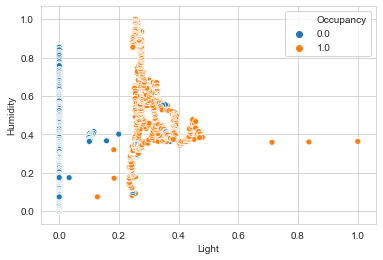

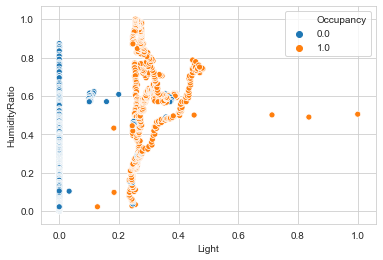

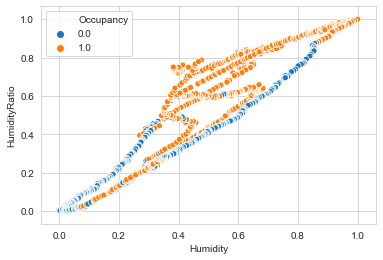

In [13]:
#scatter plots
plt.figure(figsize=(10, 5))
sns.set_style()
sns.scatterplot(data=df_norm, x='CO2', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='Light', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='Humidity', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='HumidityRatio', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='CO2', y='Light', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='CO2', y='Humidity', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='CO2', y='HumidityRatio', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='Light', y='Humidity', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='Light', y='HumidityRatio', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='Humidity', y='HumidityRatio', hue='Occupancy')
plt.show()

## Defining dependent and independent varialbes

In [14]:
Xx=df_norm.iloc[:, 1:]
        #5 & 11, 18 & 19, 20 & 21
               #,4:21]#[4,5,6,7,8,10,11,12,13,14,15,16,18,19,20,21]] #4:21]  # [10,20]]   [4,7,10,15,16,18,19,20,21] [4:8,10:16,18:21]
Yy=df_norm.iloc[:,0]
print(Xx)
print(Yy)

      Temperature  Humidity     Light       CO2  HumidityRatio
0        0.831683  0.445132  0.344793  0.330033       0.704212
1        0.835960  0.447053  0.340787  0.341523       0.708308
2        0.838812  0.440651  0.337409  0.351030       0.704689
3        0.837030  0.429448  0.290912  0.356245       0.694383
4        0.844515  0.437450  0.287877  0.360605       0.705384
...           ...       ...       ...       ...            ...
2660     0.971881  0.384102  0.476064  0.741472       0.735505
2661     0.981386  0.387943  0.477125  0.719877       0.744429
2662     0.981386  0.384102  0.481367  0.716389       0.741136
2663     0.987723  0.384102  0.479010  0.713516       0.744896
2664     1.000000  0.382146  0.470172  0.714542       0.750511

[2665 rows x 5 columns]
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2660    1.0
2661    1.0
2662    1.0
2663    1.0
2664    1.0
Name: Occupancy, Length: 2665, dtype: float64


## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xx, Yy, test_size = 0.2, random_state = 0)

In [16]:
print(X_test)
print(y_test)

      Temperature  Humidity     Light       CO2  HumidityRatio
1763     0.282772  0.607095  0.000000  0.388989       0.517565
795      0.071287  0.030942  0.000000  0.006155       0.014351
2099     0.140198  0.303548  0.000000  0.101052       0.231298
104      0.665347  0.631422  0.252762  0.650526       0.755898
1661     0.570297  0.881835  0.246870  0.833804       0.892759
...           ...       ...       ...       ...            ...
2321     0.099802  0.246679  0.000000  0.036009       0.173397
564      0.100990  0.013070  0.000000  0.017953       0.014675
2328     0.114059  0.253721  0.000000  0.038061       0.184798
1109     0.160000  0.285409  0.259832  0.274258       0.228164
666      0.095050  0.010670  0.000000  0.024724       0.010553

[533 rows x 5 columns]
1763    0.0
795     0.0
2099    0.0
104     1.0
1661    1.0
       ... 
2321    0.0
564     0.0
2328    0.0
1109    1.0
666     0.0
Name: Occupancy, Length: 533, dtype: float64


## Dimension reduction

In [17]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 3)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)



In [18]:
#var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
#var #cumulative sum of variance explained with [n] feature
#plt.xlabel('# of Features')
#plt.title('PCA Analysis')
#plt.ylim(89.5,100.5)
#plt.style.context('seaborn-whitegrid')


#plt.plot(var)

## Training the Multiple Linear Regression model on the Training set

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting the Test set results

In [21]:
y_pred = classifier.predict(X_test)

## Confusion Matirx

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[338  11]
 [  0 184]]


0.9793621013133208

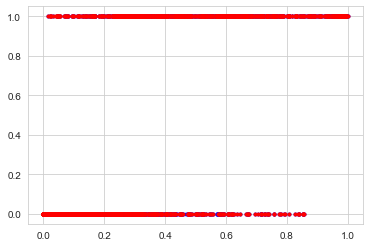

In [23]:
plt.plot(X_test,y_test,'.b')
plt.plot(X_test,y_pred,'.r')